In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Neural Network to train simple data
# 
# Data:
# 0 0 1 | 0
# 0 1 1 | 1
# 1 0 1 | 1
# 1 1 1 | 0
# 
# Fully connected network from 3 input nodes to 4 hidden nodes to 1 output node.

In [3]:
# Sigmoid
def sigmoid(a):
    return 1 / (1 + np.exp(-a))

def dsigmoid(a):
    return sigmoid(a) * (1 - sigmoid(a))

In [4]:
# Initialize data
X = np.array([[0, 0, 1], [0, 1, 1], [1, 0, 1], [1, 1, 1]])
Y = np.array([[0, 1, 1, 0]]).T

print(X)
print(Y)

[[0 0 1]
 [0 1 1]
 [1 0 1]
 [1 1 1]]
[[0]
 [1]
 [1]
 [0]]


In [13]:
# Initialize random weights
w1 = np.random.normal(size=(3, 4))
w2 = np.random.normal(size=(4, 1))

print(w1)
print(w2)

[[ 1.29481302 -0.33816718 -1.20377396  1.3146348 ]
 [ 0.10472093 -0.36133739 -0.5361247   1.65625047]
 [-0.32325801 -0.31896995 -1.12513303 -2.69845052]]
[[-0.34179677]
 [ 1.76959873]
 [ 0.4682725 ]
 [ 1.29698405]]


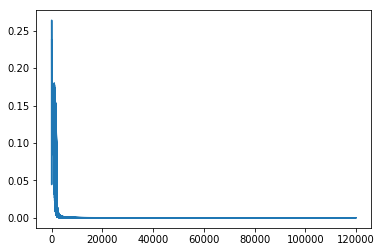

In [14]:
# For updating weights on all data
def update():
    # Initialize global variables
    global w1
    global w2
    # Forward propagation
    z1 = X.dot(w1)
    a1 = sigmoid(z1)
    z2 = a1.dot(w2)
    a2 = sigmoid(z2)
    c = (a2 - Y) ** 2 / 2
    # Backward propagation
    dc = 1
    da2 = a2 - Y
    dz2 = da2 * dsigmoid(z2)
    dw2 = a1.T.dot(dz2)
    da1 = dz2 * w2.T
    dz1 = da1 * dsigmoid(z1)
    dw1 = X.T.dot(dz1)
    w1 -= dw1
    w2 -= dw2
    return c

points = []
for i in range(30000):
    points.extend(update())
plt.plot(points)
plt.show()

In [23]:
new_data = np.array([[0, 0, 0]])
z1 = new_data.dot(w1)
a1 = sigmoid(z1)
z2 = a1.dot(w2)
a2 = sigmoid(z2)
print(float(a2))

0.7823403815780089
